In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data= pd.read_csv('C:/Users/HARSHA/Downloads/shipments.csv')
data.head(10).append(data.tail(10))

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
ID                     10999 non-null int64
Warehouse_block        10999 non-null object
Mode_of_Shipment       10999 non-null object
Customer_care_calls    10999 non-null int64
Customer_rating        10999 non-null int64
Cost_of_the_Product    10999 non-null int64
Prior_purchases        10999 non-null int64
Product_importance     10999 non-null object
Gender                 10999 non-null object
Discount_offered       10999 non-null int64
Weight_in_gms          10999 non-null int64
Reached.on.Time_Y.N    10999 non-null int64
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


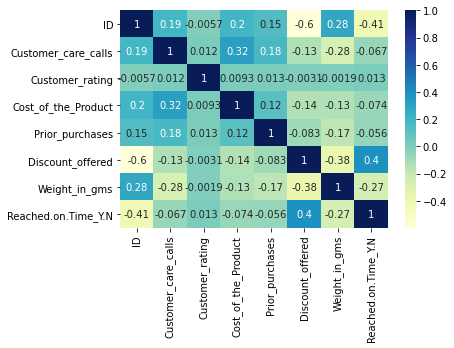

In [5]:
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [6]:
from scipy.stats.mstats import winsorize
data_win= winsorize(data["Discount_offered"],(0,0.10))
winsorized_data = data
winsorized_data["Discount_offered"] = data_win

In [7]:
data = data.drop('ID', axis=1)

In [8]:
#label encoding
data["Gender"].replace({"M":1,"F":0},inplace=True)
data.Gender=data.Gender.astype(str).str.strip()

#one hot encoding
data = pd.get_dummies(data, columns=["Warehouse_block"])
data = pd.get_dummies(data, columns=["Mode_of_Shipment"])
data = pd.get_dummies(data, columns=["Product_importance"])

In [9]:
x = data.drop("Reached.on.Time_Y.N",axis=1)   #Feature Matrix
y = data["Reached.on.Time_Y.N"]

In [10]:
#Split the Dataset
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.9, shuffle=True, random_state=1)
x_train.shape,x_test.shape

((9899, 18), (1100, 18))

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [12]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
models = {
    "                         Random Forest": RandomForestClassifier(max_depth=8, min_samples_leaf= 2, 
                                                                     min_samples_split= 2),
    "                     Gradient Boosting": GradientBoostingClassifier()}
for name, model in models.items():
    model.fit(x_train, y_train)
    print(name + " trained.")

                         Random Forest trained.
                     Gradient Boosting trained.


In [13]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(x_test, y_test) * 100))

                         Random Forest: 70.73%
                     Gradient Boosting: 70.73%


In [14]:
# Hypertuning
rf = RandomForestClassifier()
rf.get_params()
params = {"max_depth":[x for x in range (3,15)],
         "min_samples_split":[x for x in range (2,5)],
         "min_samples_leaf":[x for x in range (1,3)],
         }

In [15]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(estimator=rf,
                       param_grid = params,
                       cv = 10
                      )
grid_cv.fit(x_train, y_train)

print("Best Parameters : ", grid_cv.best_params_)

Best Parameters :  {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 4}


In [18]:
rf = RandomForestClassifier(max_depth=7, min_samples_leaf= 2, min_samples_split= 2)
rf.fit(x_train, y_train)
print(rf.score(x_test, y_test) * 100)

71.0
